In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [9]:
dict1={'age':[22,24,25,29,27,31,35,38,39,41,43,47,50,32,34],'salary':[23000,30000,43000,49000,51000,
56000,62000,59000,120000,59000,61000,
230000,90000,113000,89000],'purchesed':[0,1,1,0,1,0,1,1,1,1,0,0,1,0,1]}
dict1                                                                   

{'age': [22, 24, 25, 29, 27, 31, 35, 38, 39, 41, 43, 47, 50, 32, 34],
 'salary': [23000,
  30000,
  43000,
  49000,
  51000,
  56000,
  62000,
  59000,
  120000,
  59000,
  61000,
  230000,
  90000,
  113000,
  89000],
 'purchesed': [0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1]}

In [11]:
df=pd.DataFrame(dict1)
df.head()

,age,salary,purchesed
0,22,23000,0
1,24,30000,1
2,25,43000,1
3,29,49000,0
4,27,51000,1


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,t_test=train_test_split(df.drop("purchesed",axis=1),df['purchesed'],test_size=0.3,random_state=0)

In [15]:
df.shape

(15, 3)

In [16]:
X_train.shape

(10, 2)

In [17]:
X_test.shape

(5, 2)

In [221]:
age_mean=(X_train['age'].mean())
agestd_dev=X_train['age'].std()
sal_mean=X_train['salary'].mean()
sal_std_dev=X_train['salary'].std()

age_mean_test=X_test['age'].mean()
agestd_dev_test=X_test['age'].std()
sal_mean_test=X_test['salary'].mean()
sal_std_dev_test=X_test['salary'].std()

def standard_scaler(X_train,X_test):
        X_train_scaled_age=np.round(X_train.apply(lambda row:(row['age']-age_mean)/agestd_dev,axis=1),2)
        X_train_scaled_age.rename("age_scaled",inplace=True)
        X_train_scaled_sal=(np.round(X_train.apply(lambda row:(row['salary']-sal_mean)/sal_std_dev,axis=1,),2))
        X_train_scaled_sal.rename("sal_scaled",inplace=True)
        
        X_train_scaleddf=(pd.concat((X_train_scaled_age,X_train_scaled_sal),axis=1))
        print(X_train_scaleddf)
        
        
        X_test_scaled_age=np.round(X_test.apply(lambda row:(row['age']-age_mean_test)/agestd_dev_test,axis=1),2)
        X_test_scaled_age.rename("age_scaled_test",inplace=True)
        X_test_scaled_sal=(np.round(X_test.apply(lambda row:(row['salary']-sal_mean_test)/sal_std_dev_test,axis=1,),2))
        X_test_scaled_sal.rename("sal_scaled_test",inplace=True)
        
        X_test_scaleddf=(pd.concat((X_test_scaled_age,X_test_scaled_sal),axis=1))
        print(X_test_scaleddf)
        
        print("\n")
        print("******describtion of the old data *******")
        print(np.round(X_train.describe(),1))
        print(np.round(X_test.describe(),1))
        
        print("\n")
        print("******describtion of the newly created data *******")
        print(np.round(X_train_scaleddf.describe(),2))
        print(np.round(X_test_scaleddf.describe(),2))
        
        print("\n")
        
        print(" *******before scaling plot of the data *****")
        plt.subplot(2, 1, 1)
        print(plt.scatter(x=X_train['age'],y=X_train['salary']))
        plt.xlabel("age")
        plt.ylabel("salary")
        
        
        print("\n")
        plt.subplot(2, 1, 2)
        print(" *******after scaling plot of the data *****")
        print(plt.scatter(x=X_train_scaleddf['age_scaled'],y=X_train_scaleddf['sal_scaled']))
        plt.xlabel("age_scaled")
        plt.ylabel("salary_scaled")
        
        
        
        
        
        
        
        
    

    age_scaled  sal_scaled
4        -0.77       -0.45
2        -0.98       -0.58
13       -0.25        0.60
10        0.89       -0.28
7         0.37       -0.31
11        1.31        2.58
3        -0.56       -0.48
0        -1.29       -0.92
5        -0.35       -0.36
12        1.62        0.21
    age_scaled_test  sal_scaled_test
1             -1.61            -1.24
6              0.06            -0.29
8              0.67             1.41
9              0.97            -0.38
14            -0.09             0.50


******describtion of the old data *******
        age    salary
count  10.0      10.0
mean   34.4   77500.0
std     9.6   59089.9
min    22.0   23000.0
25%    27.5   49500.0
50%    31.5   57500.0
75%    41.8   82750.0
max    50.0  230000.0
        age    salary
count   5.0       5.0
mean   34.6   72000.0
std     6.6   34007.4
min    24.0   30000.0
25%    34.0   59000.0
50%    35.0   62000.0
75%    39.0   89000.0
max    41.0  120000.0


******describtion of the newly created 

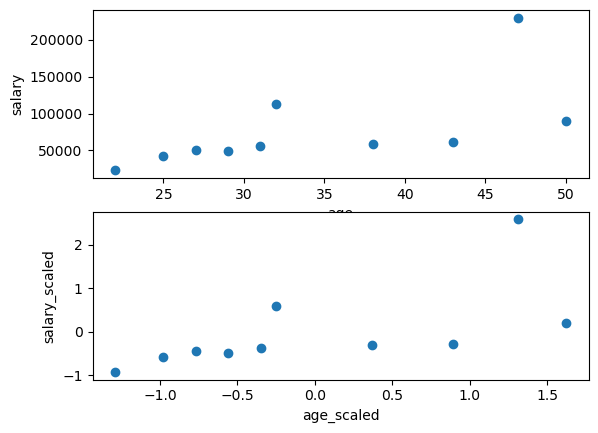

In [222]:
standard_scaler(X_train,X_test)

## using skelarn library

In [225]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the data which will calculate the mean and the standard deviation for the data 
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [226]:
scaler.mean_

array([3.44e+01, 7.75e+04])

In [229]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [231]:
print(np.round(X_train_scaled.describe(),2))

         age  salary
count  10.00   10.00
mean    0.00    0.00
std     1.05    1.05
min    -1.36   -0.97
25%    -0.76   -0.50
50%    -0.32   -0.36
75%     0.81    0.09
max     1.71    2.72


In [232]:
print(np.round(X_test_scaled.describe(),2))

        age  salary
count  5.00    5.00
mean   0.02   -0.10
std    0.72    0.61
min   -1.14   -0.85
25%   -0.04   -0.33
50%    0.07   -0.28
75%    0.50    0.21
max    0.72    0.76


In [245]:
df=pd.concat((df,pd.DataFrame({'age':[2,90,100],'salary':[1000,230000,45000],'purchesed':[0,1,1]})),ignore_index=True)

In [246]:
df.drop(columns=['level_0','index'],inplace=True)

In [247]:
df

,age,salary,purchesed
0,22,23000,0
1,24,30000,1
2,25,43000,1
3,29,49000,0
4,27,51000,1
5,31,56000,0
6,35,62000,1
7,38,59000,1
8,39,120000,1
9,41,59000,1


In [248]:
df.describe()

,age,salary,purchesed
count,30.000000,30.000000,30.000000
mean,49.233333,83833.333333,0.633333
std,35.538889,80047.866427,0.490133
min,2.000000,1000.000000,0.000000
25%,25.500000,43500.000000,0.000000
50%,38.500000,53500.000000,1.000000
75%,90.000000,107250.000000,1.000000
max,100.000000,230000.000000,1.000000


<AxesSubplot:xlabel='age'>

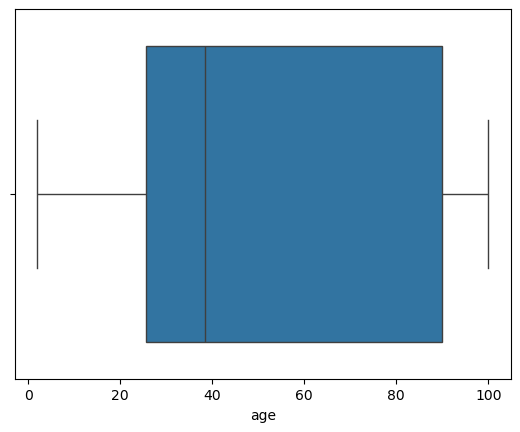

In [249]:
sns.boxplot(data=df,x=df['age'])

In [251]:
df=pd.read_csv(r"C:\Users\2174052\Desktop\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [252]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [265]:
new_df=df[['total sulfur dioxide','density','alcohol','quality']]
new_df

,total sulfur dioxide,density,alcohol,quality
0,34.0,0.99780,9.4,5
1,67.0,0.99680,9.8,5
2,54.0,0.99700,9.8,5
3,60.0,0.99800,9.8,6
4,34.0,0.99780,9.4,5
...,...,...,...,...
1594,44.0,0.99490,10.5,5
1595,51.0,0.99512,11.2,6
1596,40.0,0.99574,11.0,6
1597,44.0,0.99547,10.2,5


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

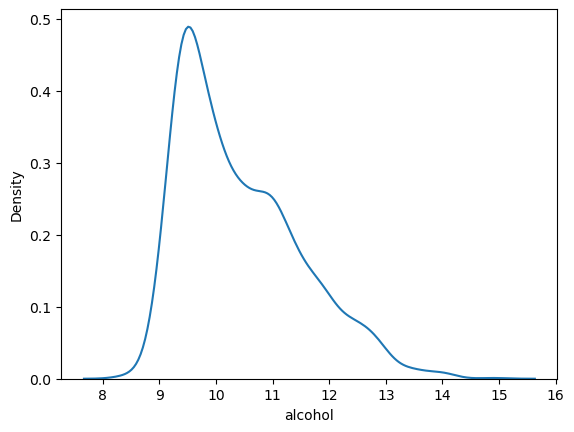

In [266]:
sns.kdeplot(df['alcohol'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

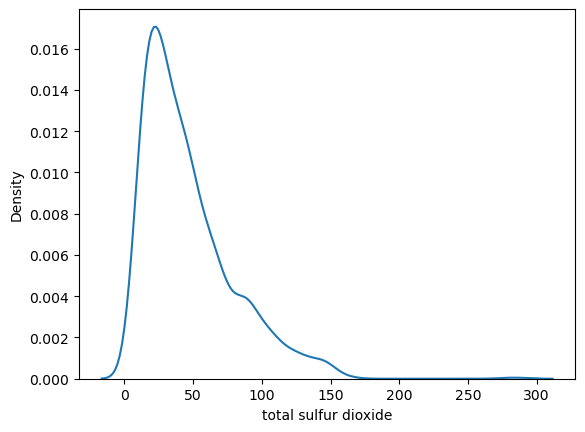

In [267]:
sns.kdeplot(data=df,x=df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

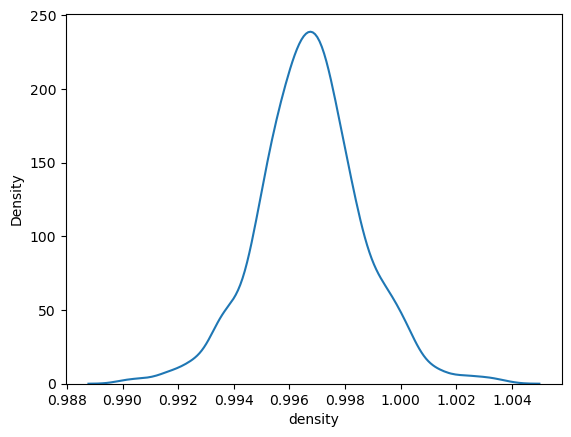

In [268]:
sns.kdeplot(data=df,x=df['density'])

<AxesSubplot:xlabel='alcohol', ylabel='total sulfur dioxide'>

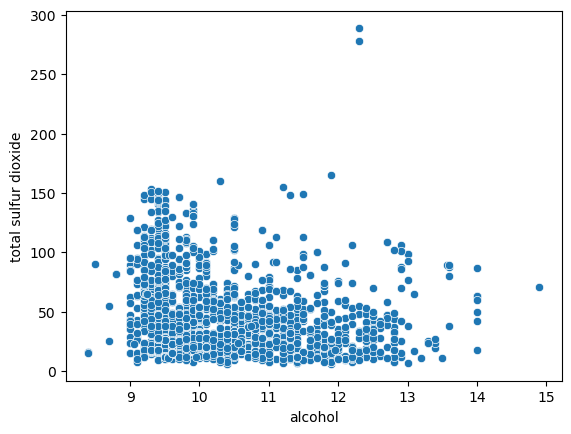

In [269]:
sns.scatterplot(data=df,x=df['alcohol'],y=df['total sulfur dioxide'])

In [270]:
np.round(new_df['alcohol'].describe(),2)

count    1599.00
mean       10.42
std         1.07
min         8.40
25%         9.50
50%        10.20
75%        11.10
max        14.90
Name: alcohol, dtype: float64

In [271]:
np.round(new_df['total sulfur dioxide'].describe(),2)

count    1599.00
mean       46.47
std        32.90
min         6.00
25%        22.00
50%        38.00
75%        62.00
max       289.00
Name: total sulfur dioxide, dtype: float64

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_df.drop('quality',axis=1),df['quality'],test_size=0.3,random_state=0)

In [273]:
X_train.shape

(1119, 3)

In [274]:
X_test.shape

(480, 3)

# minmaxscaling 

In [287]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale=MinMaxScaler()
minmaxscale.fit(X_train)

MinMaxScaler()

In [288]:
X_train_scaled_df=minmaxscale.transform(X_train)
X_test_scaled_df=minmaxscale.transform(X_test)

In [290]:
X_train_scaled_df

array([[0.44876325, 0.52349486, 0.21538462],
       [0.3639576 , 0.        , 0.66153846],
       [0.11660777, 0.50954479, 0.2       ],
       ...,
       [0.25795053, 0.49192364, 0.16923077],
       [0.14487633, 0.88325991, 0.66153846],
       [0.51590106, 0.58223201, 0.15384615]])

In [291]:
X_test_scaled_df

array([[0.21201413, 0.5969163 , 0.36923077],
       [0.02826855, 0.62187959, 0.18461538],
       [0.07420495, 0.37371512, 0.50769231],
       ...,
       [0.21201413, 0.53817915, 0.12307692],
       [0.03180212, 0.36049927, 0.30769231],
       [0.14840989, 0.55286344, 0.15384615]])

In [295]:
X_test_scaled_df=pd.DataFrame(data=X_test_scaled_df,columns=X_test.columns)

In [296]:
X_test_scaled_df

,total sulfur dioxide,density,alcohol
0,0.212014,0.596916,0.369231
1,0.028269,0.621880,0.184615
2,0.074205,0.373715,0.507692
3,0.028269,0.596916,0.246154
4,0.000000,0.501468,0.307692
...,...,...,...
475,0.038869,0.534508,0.246154
476,0.374558,0.494126,0.138462
477,0.212014,0.538179,0.123077
478,0.031802,0.360499,0.307692


In [297]:
X_train_scaled_df=pd.DataFrame(data=X_train_scaled_df,columns=X_train.columns)
X_train_scaled_df

,total sulfur dioxide,density,alcohol
0,0.448763,0.523495,0.215385
1,0.363958,0.000000,0.661538
2,0.116608,0.509545,0.200000
3,0.077739,0.488253,0.430769
4,0.286219,0.567548,0.323077
...,...,...,...
1114,0.102473,0.536711,0.184615
1115,0.173145,0.475771,0.138462
1116,0.257951,0.491924,0.169231
1117,0.144876,0.883260,0.661538


In [298]:
X_train_scaled_df.describe()

,total sulfur dioxide,density,alcohol
count,1119.000000,1119.000000,1119.000000
mean,0.146458,0.490804,0.309218
std,0.121072,0.139482,0.163815
min,0.000000,0.000000,0.000000
25%,0.056537,0.406021,0.169231
50%,0.113074,0.488253,0.261538
75%,0.201413,0.571953,0.405128
max,1.000000,1.000000,1.000000


# mean normalization

# maxabs scaling

# robust scaling